# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

## K-Nearest Neighbor (K-NN)

Para una nueva instancia, el K-NN encuentra los puntos de datos más cercanos o los vecinos más cercanos del conjunto de datos a través del cual se entrena el modelo.

K-NN considera el número K de los vecinos más cercanos para la nueva entrada, K es generalmente definida por el usuario. La predicción para el nuevo punto de datos es simplemente la clase de sus K puntos de datos más cercanos.

<img src="../imagenes/KnnClassification.png" width="400" height="400"/>

El valor K es un factor importante para decidir el comportamiento del modelo. Los valores bajos de K pueden comprometer la precisión del modelo, ya que el ruido puede tener un efecto más significativo en el modelo, mientras que los valores altos de K hacen que el algoritmo K-NN sea computacionalmente intensivo. Por lo tanto, se elige el valor más bajo de K que genera una mayor tasa de exactitud. La selección de un valor óptimo de K es muy crucial.

Se utilizan diferentes tipos de medidas de distancia para encontrar cuáles son los vecinos más cercanos. La medida de distancia más común es la distancia euclidiana.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('../Datos/heart.csv')
dataset.head()
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

#### Dividimos el conjunto de datos en entrenamiento y de prueba

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
random_state = 0)

#### Entrenamiento del modelo K-NN

Utilizando la clase KNeighborsClassifier, este usa n_neighbors para iniciar, este es el valor K. También podemos pasar medidas de distancia, pero por defaul utilizaremos distancia euclidiana. Utilizaremos un valor K=1 y determinaremos la exactitud del modelo y despues investigamos como se podría predecir el valor K óptimo.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluación con K=1

In [6]:
#Vamos a realizar la evaluación de nuestro modelo con K=1
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))



[[12 21]
 [15 28]]


              precision    recall  f1-score   support

           0       0.44      0.36      0.40        33
           1       0.57      0.65      0.61        43

    accuracy                           0.53        76
   macro avg       0.51      0.51      0.50        76
weighted avg       0.52      0.53      0.52        76



Con K=1 tenemos una exactitud de 53%, que está por debajo de nuestra precisión de referencia.

#### Como elegír un valor K

Al elegir un valor K óptimo, iniciaremos el modelo con varios valores K y realizaremos un seguimiento de los errores. En este caso, la definición de error es el número de etiquetas predichas incorrectamente o erróneamente a partir de los datos de prueba. A continuación trazaremos los datos de error frente a los valores K y elegiremos los valores K con error mínimo.

In [7]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

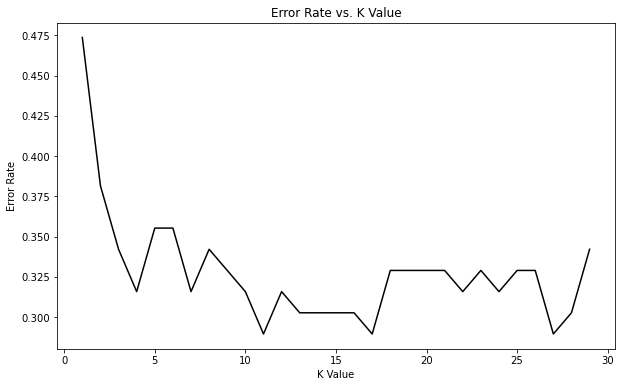

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='black')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

La gráfica de la tasa de error frente al valor K a menudo se denomina gráfica de codo porque inicialmente, los valores pequeños de K suelen tener tasas de error más altas. La tasa de error disminuye gradualmente con un aumento de valor K y, finalmente, la curva se aplana y se asemeja a un codo. La gráfica muestra que el error es bajo en ciertos valores de K. Seleccionamos el menor valor K entre los valores K que producen un error mas bajo. Por lo tanto tomemos K=11.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[20 13]
 [ 9 34]]


              precision    recall  f1-score   support

           0       0.69      0.61      0.65        33
           1       0.72      0.79      0.76        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



Podemos identificar que el modelo mejoro y tiene una exactitud del 71%. 

#### Escalando datos

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size =
0.25, random_state = 0)

Text(0, 0.5, 'Error Rate')

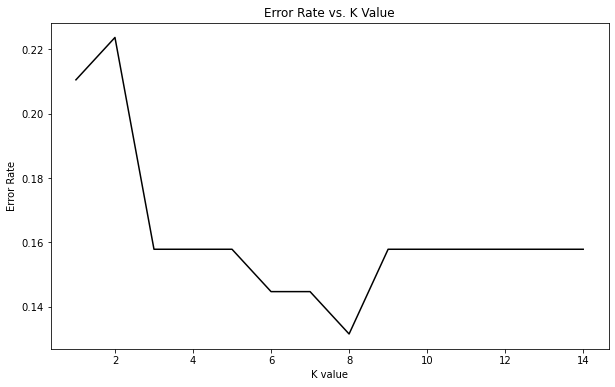

In [11]:
error_rate = []

# Vamos a probar algunos valores
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='black')
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[27  6]
 [ 4 39]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



Con el escalado de datos obtenemos una exactitud de 87%. 

#### Predicción de nuevos valores

In [13]:
#Tomemos una instancia desde el data set original
dataset.iloc[2,:]

age          41.0
sex           0.0
cp            1.0
trestbps    130.0
chol        204.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       1.4
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 2, dtype: float64

In [14]:
new_data=dataset.iloc[2,:-1].values
#realizamos la predicción de la etiqueta con base a los datos
classifier.predict(sc.transform([new_data]))

/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

### Diagnóstico de la enfermedad hepática usando K-NN

Los pacientes con enfermedades del hígado han ido aumentado continuamente debido al consumo excesivo de alcohol, inhalación de gases nocivos, ingesta de alimentos contaminados, encurtidos y drogas. 

Este dataset contiene 416 registros de pacientes hepáticos y 167 registro de pacientes no hepáticos recolectados en India (Venkata Ramana et al. 2011). 

El dataset contiene las siguientes características:
1. Edad del paciente
2. Genero
3. Bilirrubina total
4. Bilirrubina Directa
5. Fosfatasa alcalina
6. Alamina Aminotransferasa
7. Aspartato Aminotransferasa
8. Proteínas totales 
9. Albúmina
10. Proporción de albúmina y globulina
11. Etiquetas del dataset


https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [15]:
dataset = pd.read_csv('../Datos/indian_liver_patient.csv')
dataset.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


Vamos a cambiar el nombre de la variable dependiente de Dataset a Target. La fila Gender tiene los datos en tipo cadena, debido a que los algoritmos solo pueden manejar valores numéricos, por lo que convertiremos estos datos a valores categóricos, Female a 0 y male a 1.

In [16]:
dataset = dataset.rename({'Dataset':'Target'},axis=1)
dataset['Gender'] = dataset['Gender'].map({'Female':0,'Male':1})
dataset.isnull().sum() ## Analizamos los valores faltantes,
#solo Albumin_and_Globulin_Ratio  tiene 4 valores nulos

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

### Imputación de valores faltantes

Convencionalmente los conjuntos de datos tienden a tener valores faltantes, existen algunas estrategías para tratar con estos valores perdidos.

1.- Lo más simple es descartarlos o eliminarlos del conjunto de datos. Sin embargo en conjuntos de datos pequeños esto puede conducir a la pérdida de información.

2.- Otra técnicas es reemplazar el valor nulo con la observación más común de esas características, de acuerdo a la media, la medina o la moda. Esto se denomina imputación del valor perdido. 

Otra alternativa es realizar una predicción de los valores nulos en función de sus puntos de datos más cercanos o predecir esos valores en función de otras características independientes, utilizando algoritmos de Machine lerarning, preferentemente K-NN realizando una imputación del vecino más cercano.

In [17]:
#Primero realizaremos una imputación simple utilizando la media
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
non_nan_data = imputer.fit_transform(dataset)
dataset = pd.DataFrame(non_nan_data,columns = dataset.columns)
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [18]:
#También podemos realizar una imputación utilizando K-NN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
non_nan_data = imputer.fit_transform(dataset)
dataset = pd.DataFrame(non_nan_data,columns = dataset.columns)
dataset.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [19]:
dataset['Target'].value_counts()

1.0    416
2.0    167
Name: Target, dtype: int64

El dataset contiene 416 observaciones para pacientes hepáticos y 167 observaciones para pacientes no hepáticos. El dataset esta desequilibrado y tiene una exactitud del 416/583=0.71.

In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Gender,583.0,0.756432,0.429603,0.0,1.0,1.000000,1.0,1.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8


In [21]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [22]:
#Escalado de datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [23]:
#Dividimos en datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Text(0, 0.5, 'Error Rate')

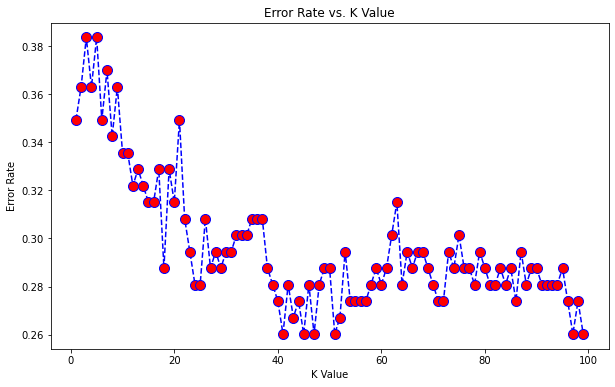

In [24]:
#Eligimos un valor K

error_rate = []

# Tomamos diferentes valores
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=9


[[88 16]
 [32 10]]


              precision    recall  f1-score   support

         1.0       0.73      0.85      0.79       104
         2.0       0.38      0.24      0.29        42

    accuracy                           0.67       146
   macro avg       0.56      0.54      0.54       146
weighted avg       0.63      0.67      0.64       146



La precisión es del 75 % y aunque es más alta que la precisión base, el modelo no se desempeñó significativamente bien. Los factores se asemejan a un alto falso negativo. La baja precisión, el recall y el F1score para la clase 2 sugirieron que el modelo está sesgado hacia "1.0" es decir sesgado a predecira al paciente como hepático. Si bien el desequilibrio de clases es la razón principal de esto, puede haber otras razones presentes, como la baja correlación de las características con la variable dependiente. Esto se puede verificar trazando el mapa de calor de la matriz de correlación de este dataset.

<AxesSubplot:>

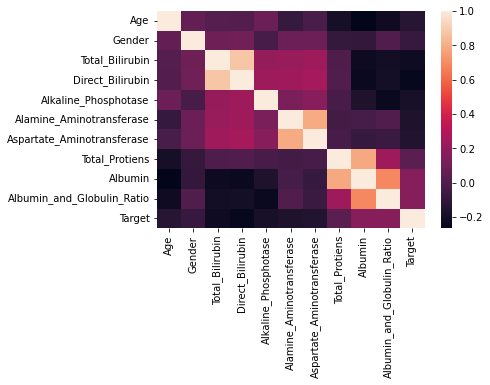

In [26]:
sns.heatmap(dataset.corr())

Las intensidades de la columna “Target” muestran que tiene muy poca correlación con todas las demás variables, que pueden estar entre 0.2 y −0.2. Por lo tanto, el conjunto de datos está desequilibrado y tiene una correlación baja para la variable dependiente, que son dos de los principales inconvenientes para implementar el modelo de aprendizaje automático en este conjunto de datos.